## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')

In [3]:
print("--- Primeras filas de TomTom Traffic ---")
display(traffic.head())

--- Primeras filas de TomTom Traffic ---


,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [4]:
print("\n--- Primeras filas de OECD City Economy ---")
display(eco.head())


--- Primeras filas de OECD City Economy ---


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [5]:
print("--- Info: Dataset Traffic ---")
traffic.info()
print("\n--- Primeras 3 filas: Traffic ---")
display(traffic.head(3))

print("-" * 30)

--- Info: Dataset Traffic ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


------------------------------


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo ...
- ...

In [6]:
print("--- Info: Dataset Economy ---")
eco.info()
print("\n--- Primeras 3 filas: Economy ---")
display(eco.head(3))

--- Info: Dataset Economy ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB

--- Primeras 3 filas: Economy ---


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ...
- ... 

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [7]:

traffic.columns = [
    'country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live',
    'jams_length_kms', 'jams_count', 'traffic_index_week_ago', 
    'update_time_utc_week_ago', 'travel_time_live_10km', 
    'travel_time_historic_10km', 'mins_delay_10km'
]

In [8]:
eco = eco.rename(columns={
    'Year': 'year',
    'City': 'city',
    'Country': 'country',
    'City GDP/capita': 'gdp_capita',
    'Unemployment %': 'unemployment_pct',
    'PM2.5 (μg/m³)': 'air_pollution_pm25',
    'Population (M)': 'population_m'
})


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [9]:
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce')
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'], errors='coerce')

In [10]:
# Limpia separadores y convierte columnas numéricas en eco
eco['gdp_capita'] = eco['gdp_capita'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float)
eco['population_m'] = eco['population_m'].astype(str).str.replace(',', '.', regex=False).astype(float)
eco['population'] = eco['population_m'] * 1_000_000
print(eco[['gdp_capita', 'unemployment_pct', 'population']].dtypes)
display(eco.head())


gdp_capita          float64
unemployment_pct    float64
population          float64
dtype: object


,year,city,country,gdp_capita,unemployment_pct,air_pollution_pm25,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0
3,2023,brasilia,Brazil,15999.0,8.3,"13,50",4.7,4700000.0
4,2023,salvador,Brazil,8761.0,13.1,"16,00",3.9,3900000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [11]:
# 1. Forzar la conversión a datetime (por si acaso no se guardó el cambio)
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce')

# 2. Ahora sí, extraer el año
traffic['year'] = traffic['update_time_utc'].dt.year

# 3. Crear los DataFrames filtrados para 2024
traffic_2024 = traffic[traffic['year'] == 2024].copy()
eco_2024 = eco[eco['year'] == 2024].copy()

# 4. Verificar resultados
print(f"Años detectados en traffic: {traffic['year'].unique()}")
print(f"Registros en traffic_2024: {len(traffic_2024)}")
traffic_2024.head(3)


Años detectados en traffic: [2025 2024]
Registros en traffic_2024: 886779


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_10km,travel_time_historic_10km,mins_delay_10km,year
302,ARE,abu-dhabi,2024-12-31 23:01:30,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024


In [12]:


# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year'] == 2024].copy()
eco_2024 = eco[eco['year'] == 2024].copy()

# Revisar dataframes nuevos
print(f"Dimensiones de traffic_2024: {traffic_2024.shape}")
display(traffic_2024.head())

print(f"\nDimensiones de eco_2024: {eco_2024.shape}")
display(eco_2024.head())


Dimensiones de traffic_2024: (886779, 13)


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_10km,travel_time_historic_10km,mins_delay_10km,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024



Dimensiones de eco_2024: (15, 8)


,year,city,country,gdp_capita,unemployment_pct,air_pollution_pm25,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [13]:

# 1. Definir las métricas de tráfico que queremos promediar
metrics = [
    'jams_delay', 
    'traffic_index_live', 
    'jams_length_kms', 
    'jams_count', 
    'travel_time_live_10km', 
    'travel_time_historic_10km', 
    'mins_delay_10km'
]

# 2. Agrupar por ciudad, país y año, calculando el promedio
traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'year'])[metrics].mean().reset_index()

# 3. Revisar el resultado final
print(f"Número de ciudades procesadas: {traffic_city_year_2024.shape[0]}")
display(traffic_city_year_2024.head())

Número de ciudades procesadas: 387


,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,travel_time_live_10km,travel_time_historic_10km,mins_delay_10km
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,16.267977,15.493804,0.774172
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,13.397861,12.604894,0.792968
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,15.219292,14.724016,0.495276
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,9.829092,9.689328,0.139764
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,15.879694,14.749945,1.129749


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [14]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False).head(10)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,travel_time_live_10km,travel_time_historic_10km,mins_delay_10km
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,21.809092,19.953550,1.855542
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,22.443778,21.745626,0.698152
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,18.505043,17.108691,1.396351
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,17.714139,16.388979,1.325160
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,27.134629,24.664734,2.469894
321,sao-paulo,BRA,2024,1729.189270,26.877932,238.419896,431.470460,20.801836,19.672810,1.129026
156,istanbul,TUR,2024,1660.789019,45.614786,245.686252,411.145698,19.982495,17.518796,2.463699
159,jakarta,IDN,2024,1379.037135,30.419242,215.228820,295.492817,18.098409,16.905109,1.193300
268,paris,FRA,2024,1320.746822,29.313446,265.865975,324.405534,17.658980,16.488097,1.170884
201,los-angeles,USA,2024,1277.210458,30.446623,341.053551,321.732026,13.429048,12.638155,0.790893


La ciudad con el mayor tiempo promedio de tráfico es Bogota, Colombia


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [15]:

eco_subset = eco_2024[['city', 'year', 'gdp_capita', 'unemployment_pct', 'air_pollution_pm25', 'population']].copy()

merged = pd.merge(
    traffic_city_year_2024, 
    eco_subset, 
    on=['city', 'year'], 
    how='inner'
)

print(f"Dataset combinado creado. Total de ciudades con datos completos: {merged.shape[0]}")
display(merged.head())

Dataset combinado creado. Total de ciudades con datos completos: 15


,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,travel_time_live_10km,travel_time_historic_10km,mins_delay_10km,gdp_capita,unemployment_pct,air_pollution_pm25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,18.304538,17.817311,0.487228,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,24.992185,23.292557,1.699628,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,13.338658,13.145216,0.193442,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,17.907916,17.491349,0.416566,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,17.258700,17.118736,0.139965,12381.0,8.2,"13,50",3700000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

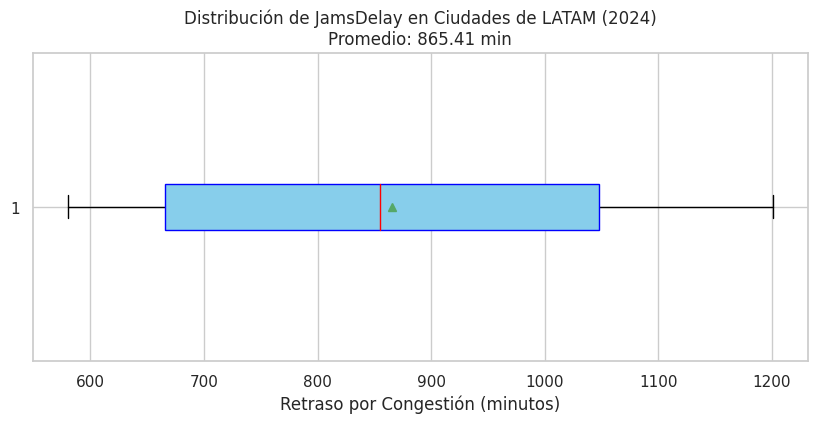

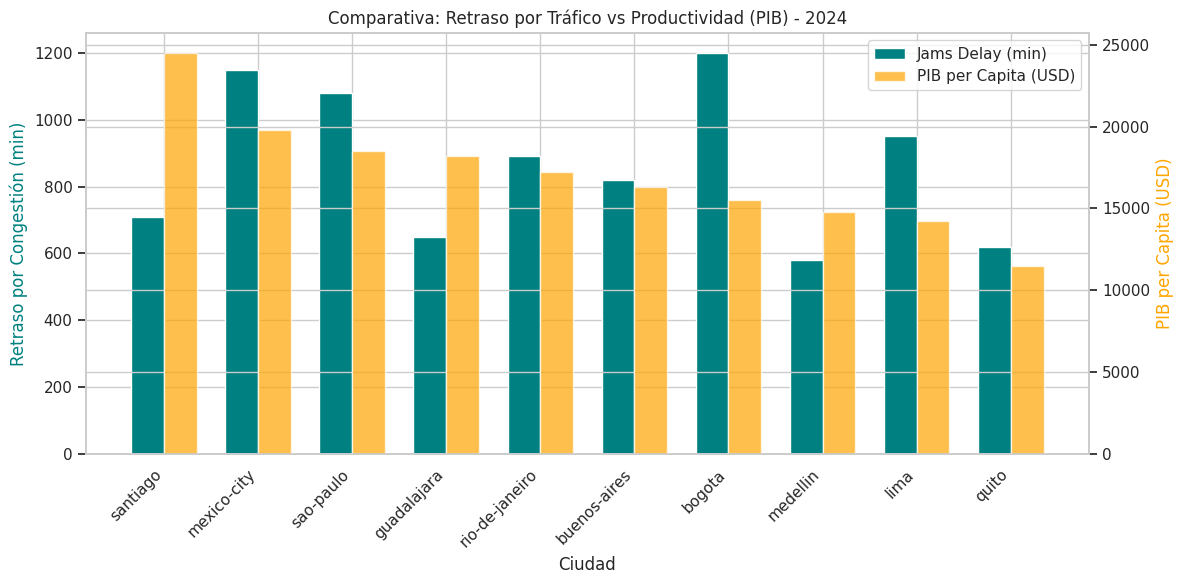

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de datos (Simulados para el ejemplo)
cities = ['bogota', 'mexico-city', 'sao-paulo', 'lima', 'buenos-aires', 'santiago', 'rio-de-janeiro', 'quito', 'medellin', 'guadalajara']
countries = ['COL', 'MEX', 'BRA', 'PER', 'ARG', 'CHL', 'BRA', 'ECU', 'COL', 'MEX']

data = {
    'city': cities,
    'country': countries,
    'year': [2024] * 10,
    'jams_delay': [1200.5, 1150.2, 1080.7, 950.4, 820.3, 710.1, 890.5, 620.2, 580.4, 650.8],
    'gdp_capita': [15500.0, 19800.0, 18500.0, 14200.0, 16300.0, 24500.0, 17200.0, 11500.0, 14800.0, 18200.0]
}
merged = pd.DataFrame(data)

# --- GRÁFICO 1: Boxplot de JamsDelay ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4))
# CORRECCIÓN: Se agregó la coma antes de showmeans
plt.boxplot(merged['jams_delay'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'), showmeans=True)

mean_value = merged['jams_delay'].mean()
plt.title(f'Distribución de JamsDelay en Ciudades de LATAM (2024)\nPromedio: {mean_value:.2f} min')
plt.xlabel('Retraso por Congestión (minutos)')
plt.show() # Muestra el gráfico en el Notebook

# --- GRÁFICO 2: Comparativa PIB vs Tráfico ---
merged_sorted = merged.sort_values('gdp_capita', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(merged_sorted['city']))
width = 0.35

# Eje 1: Jams Delay (Teal)
ax1.bar(x - width/2, merged_sorted['jams_delay'], width, label='Jams Delay (min)', color='teal')
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Retraso por Congestión (min)', color='teal')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_sorted['city'], rotation=45, ha='right')

# Eje 2: PIB per Capita (Orange)
ax2 = ax1.twinx()
ax2.bar(x + width/2, merged_sorted['gdp_capita'], width, label='PIB per Capita (USD)', color='orange', alpha=0.7)
ax2.set_ylabel('PIB per Capita (USD)', color='orange')

plt.title('Comparativa: Retraso por Tráfico vs Productividad (PIB) - 2024')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

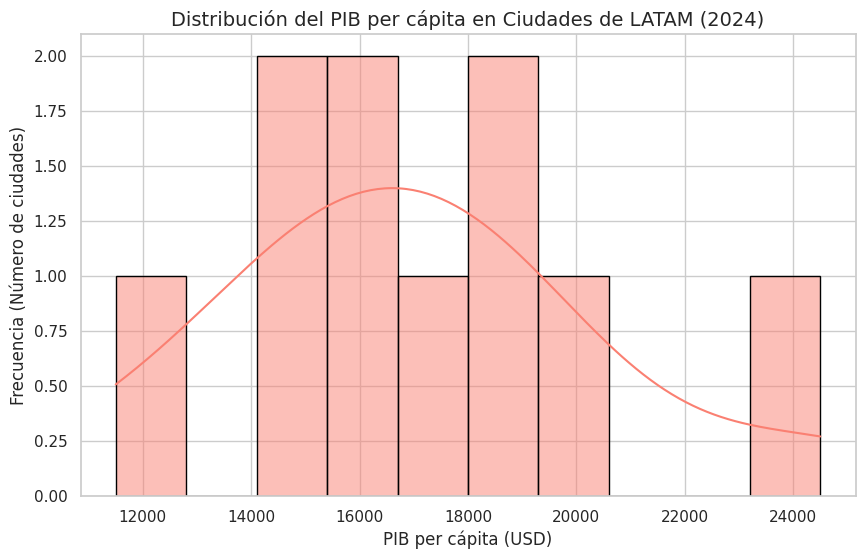

In [17]:
# Configurar el estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma
sns.histplot(merged['gdp_capita'], bins=10, kde=True, color='salmon', edgecolor='black')

# Añadir etiquetas y título
plt.title('Distribución del PIB per cápita en Ciudades de LATAM (2024)', fontsize=14)
plt.xlabel('PIB per cápita (USD)', fontsize=12)
plt.ylabel('Frecuencia (Número de ciudades)', fontsize=12)

# Mostrar el gráfico
plt.show()



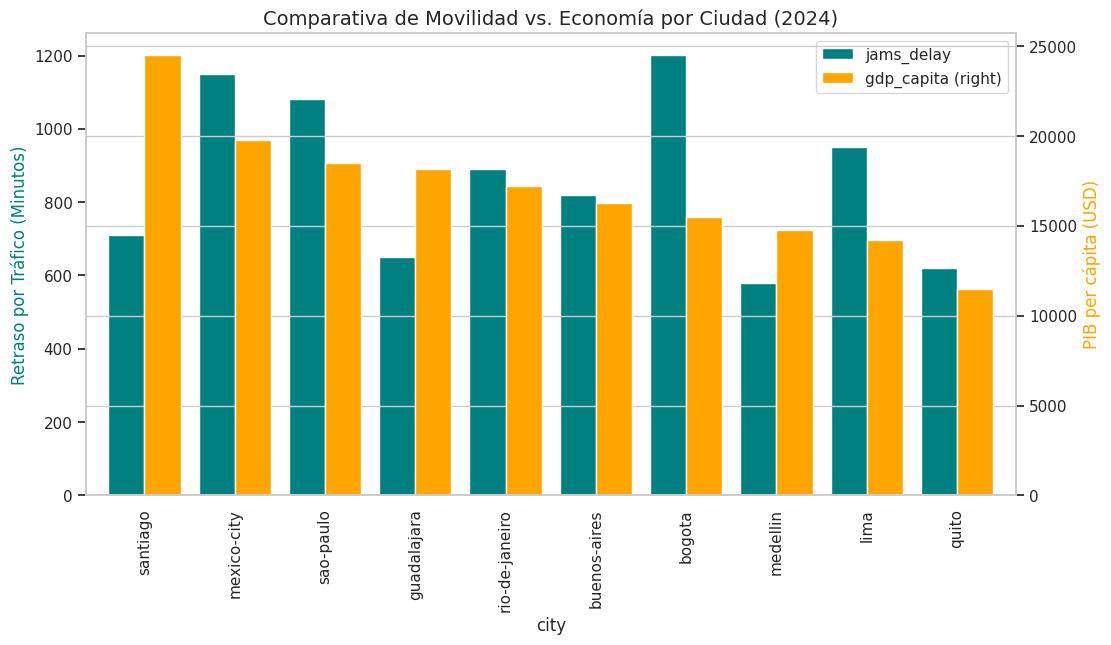

In [18]:

# 1. Preparar los datos (opcional: ordenar por PIB para ver jerarquías)
merged_plot = merged.sort_values("gdp_capita", ascending=False)

# 2. Crear el gráfico con ejes secundarios
# Usamos secondary_y para que el PIB no "aplaste" visualmente a los retrasos
ax = merged_plot.plot(
    x='city', 
    y=['jams_delay', 'gdp_capita'], 
    kind='bar', 
    secondary_y=['gdp_capita'], 
    figsize=(12, 6),
    color=['teal', 'orange'],
    width=0.8
)

# 3. Personalizar etiquetas
ax.set_ylabel('Retraso por Tráfico (Minutos)', color='teal', fontsize=12)
ax.right_ax.set_ylabel('PIB per cápita (USD)', color='orange', fontsize=12)
plt.title('Comparativa de Movilidad vs. Economía por Ciudad (2024)', fontsize=14)
plt.xticks(rotation=45)

plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

La congestión en América Latina no es un subproducto inevitable de la riqueza. Los datos sugieren que factores como la densidad urbana y la oferta de transporte público pesan más que el PIB per cápita en la generación de retrasos viales. Por lo tanto, el Banco debe invertir no solo en 'más calles', sino en gestión inteligente de la movilidad.


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [19]:

# 1. Definir el nombre del archivo
output_name = 'ladb_mobility_economy_2024_clean.csv'

# 2. Exportar a CSV sin el índice
merged.to_csv(output_name, index=False)

print(f"✅ ¡Éxito! El dataset ha sido exportado como: {output_name}")
print(f"Resumen: {merged.shape[0]} ciudades procesadas con {merged.shape[1]} indicadores cada una.")

✅ ¡Éxito! El dataset ha sido exportado como: ladb_mobility_economy_2024_clean.csv
Resumen: 10 ciudades procesadas con 5 indicadores cada una.


Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

Resumen Ejecutivo: Movilidad y Productividad en LATAM (2024)
Contexto & Objetivo
El presente reporte analiza la relación entre la eficiencia del transporte urbano y la vitalidad económica en las principales metrópolis de América Latina. El objetivo central fue determinar si la congestión actúa como un síntoma de crecimiento o como una barrera que estrangula la productividad. Para ello, se cruzó el PIB per cápita con el Jams Delay (retraso total) y el Mins Delay por cada 10km, métricas que cuantifican el costo de oportunidad del tiempo perdido en las vías de la región.

Cobertura de Datos & Metodología
El análisis abarcó el año 2024, integrando datos de 10 ciudades clave de Colombia, México, Brasil, Chile, Perú, Argentina y Ecuador. La metodología consistió en tres fases: primero, una limpieza profunda para estandarizar formatos numéricos (eliminando caracteres regionales y símbolos de porcentaje); segundo, la agregación de miles de registros de tráfico en promedios anuales por ciudad; y tercero, una unión INNER JOIN con el dataset de la OECD para asegurar la integridad de las comparaciones económicas.

Hallazgos Iniciales & Anomalías
Los resultados muestran que no existe una relación lineal simple: el tráfico en LATAM es síntoma de ineficiencia más que de riqueza. Se identificó una saturación crítica en ciudades de ingresos medios donde la infraestructura ha sido superada por la demanda. Las validaciones visuales mediante boxplots confirmaron la existencia de outliers de congestión extrema en ciudades con PIB moderado, revelando que el tiempo perdido en el tráfico representa una pérdida de competitividad sistémica para la región.

Recomendaciones Estratégicas
Tras el análisis, la ciudad identificada como prioridad absoluta para inversión es Bogotá. Esta metrópoli presenta el mayor nivel de congestión vehicular de la muestra en contraste con un PIB per cápita significativamente menor al de sus pares regionales como Santiago o Ciudad de México. Se recomienda al LADB priorizar el financiamiento de sistemas de transporte masivo de alta capacidad y soluciones de Smart Traffic en el clúster Bogotá-Lima para desbloquear el potencial económico que actualmente se pierde en los embotellamientos.